# Detecção de Emoção na voz

### Importações

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.io import wavfile
import os.path
import IPython.display
import seaborn as sns
import librosa
import librosa.display
import soundfile 
from IPython.display import Audio

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from keras import optimizers

import warnings

### Conjunto de Dados

In [52]:
#image_dir = Path('/content/drive/MyDrive/VERBO-Dataset/VERBO-Dataset/Audios')
image_dir = Path('C:/Users/eduarda.almeida/Downloads/VERBO-Dataset/Audios')

In [53]:
filepaths = list(image_dir.glob(r'**/*.wav'))

In [54]:
labels = list(map(lambda x: os.path.split(x)[1].split('-')[0], filepaths))

In [55]:
set(labels)

{'ale', 'des', 'med', 'neu', 'rai', 'sur', 'tri'}

Eles correspondem as seguintes emoções:

RAI: Raiva 😡
DES: Desgosto 🤢
MED: Medo 😱
ALE: Alegria 😀
NEU: Neutro 😐
TRI: Tristeza 😭

In [56]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

audio_df = pd.concat([filepaths, labels], axis=1)
audio_df

Filepath Label
0     C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   ale
1     C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   ale
2     C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   ale
3     C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   ale
4     C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   ale
...                                                 ...   ...
1162  C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   tri
1163  C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   tri
1164  C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   tri
1165  C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   tri
1166  C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   tri

[1167 rows x 2 columns]

### EDA

In [57]:
#Caso dê erro nos plots
#%matplotlib notebook
#%matplotlib inline

<Axes: xlabel='Label', ylabel='Count'>

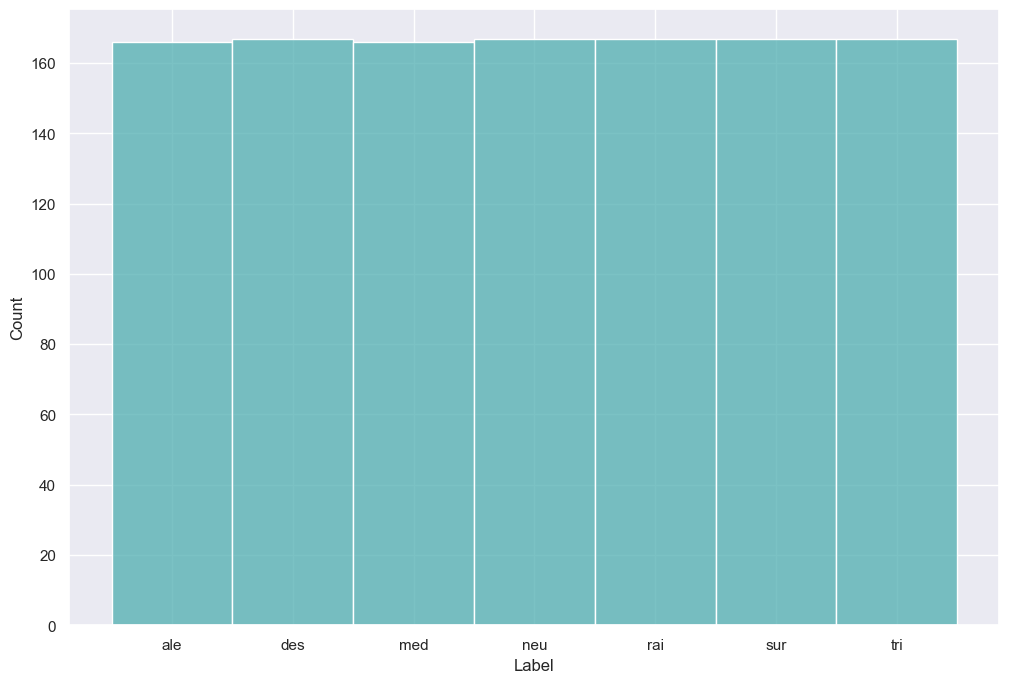

In [58]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('darkgrid')
sns.histplot(labels, color='#4FAEB0')

In [59]:
audio_arrays = []

for i in audio_df['Filepath']:
    x, sr = librosa.load(i, sr=44100)
    audio_arrays.append(x)

audio_df['Arrays'] = audio_arrays

In [60]:
#audio_df = pd.read_csv("/content/drive/MyDrive/dados.csv")

In [61]:
audio_df

Filepath Label  \
0     C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   ale   
1     C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   ale   
2     C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   ale   
3     C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   ale   
4     C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   ale   
...                                                 ...   ...   
1162  C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   tri   
1163  C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   tri   
1164  C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   tri   
1165  C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   tri   
1166  C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   tri   

                                                 Arrays  
0     [-0.00036621094, -0.00030517578, 0.0010986328,...  
1     [0.0002746582, -9.1552734e-05, -0.0002746582, ...  
2     [-0.00030517578, 0.00045776367, 0.0008239746, ...  
3     [0.00024414062, 0.0006713867, 0.0013427734, 0....  
4     [0.0007324219, -0.00024414062, -0.0015869141, ...  
...                                                 ...  
1162  [0.006225586, 0.0037231445, 0.0030517578, 0.00...  
1163  [0.051116943, 0.04650879, 0.047576904, 0.04330...  
1164  [0.0128479, 0.009918213, 0.0021362305, -0.0022...  
1165  [0.0011901855, 0.00076293945, 0.00076293945, 0...  
1166  [0.013519287, 0.011749268, 0.011199951, 0.0095...  

[1167 rows x 3 columns]

In [62]:
#from google.colab import files
#csv_file = 'dados.csv'
#audio_df.to_csv(csv_file, index=False)

# Fornecer link para download
#files.download(csv_file)

#### Raiva

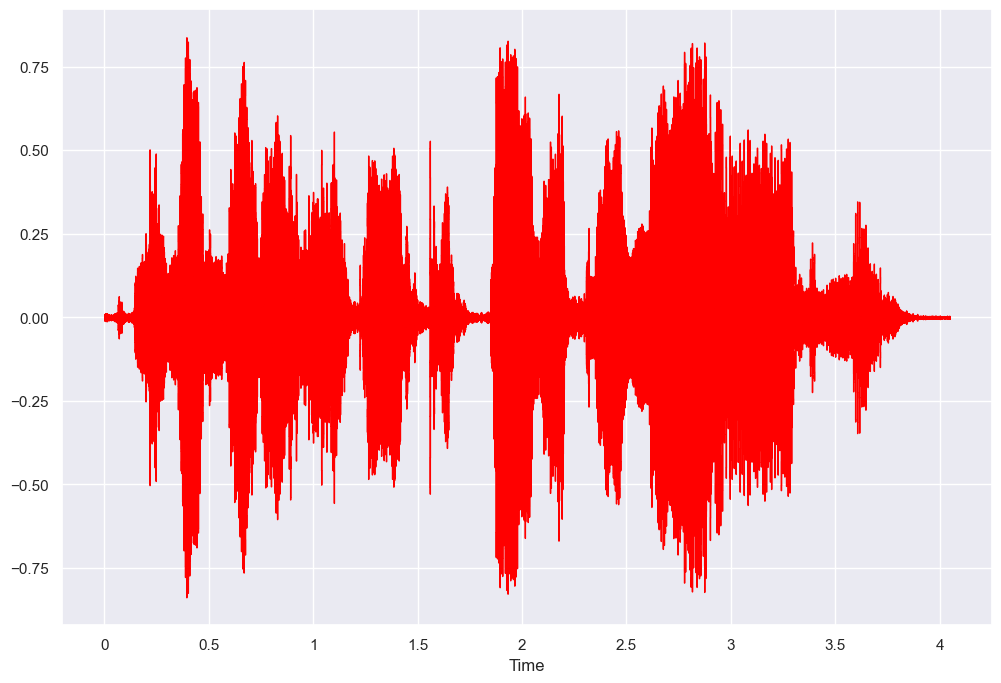

In [63]:
raiva_file = audio_df[audio_df['Label'] == 'rai']['Filepath']
raiva_array = audio_df[audio_df['Label'] == 'rai']['Arrays']

librosa.display.waveshow(raiva_array.iloc[0], color='#FF0000')
IPython.display.Audio(raiva_file.iloc[0])


#### Desgosto

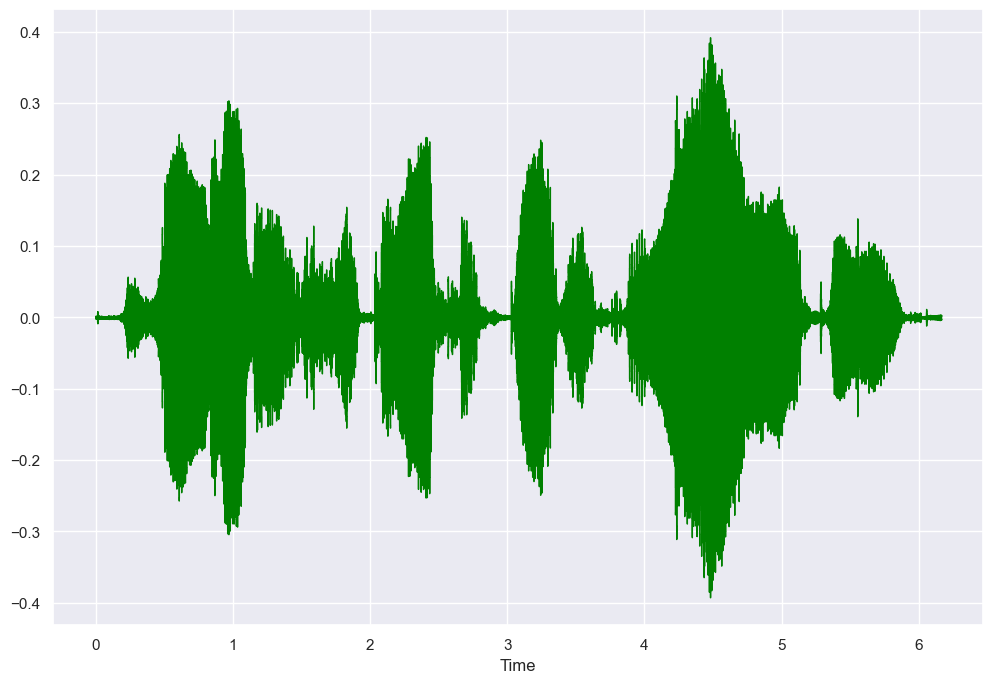

In [64]:
des_file = audio_df[audio_df['Label'] == 'des']['Filepath']
des_array = audio_df[audio_df['Label'] == 'des']['Arrays']

librosa.display.waveshow(des_array.iloc[0], color='#008000')
IPython.display.Audio(des_file.iloc[0])

#### Medo

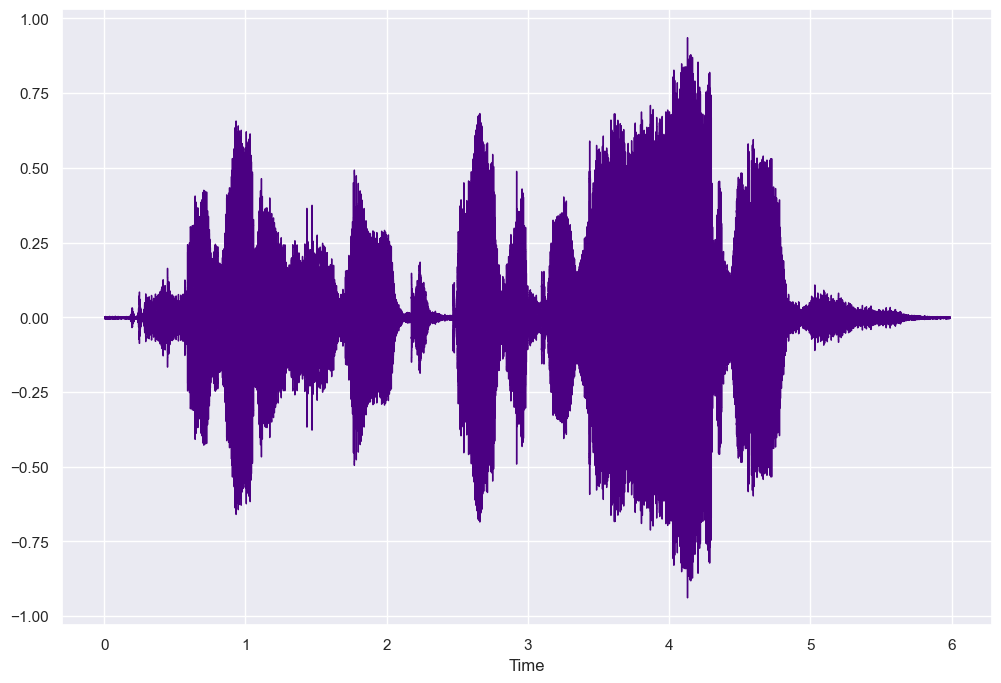

In [65]:
med_file = audio_df[audio_df['Label'] == 'med']['Filepath']
med_array = audio_df[audio_df['Label'] == 'med']['Arrays']

librosa.display.waveshow(med_array.iloc[0], color='#4B0082')
IPython.display.Audio(med_file.iloc[0])

#### Alegria

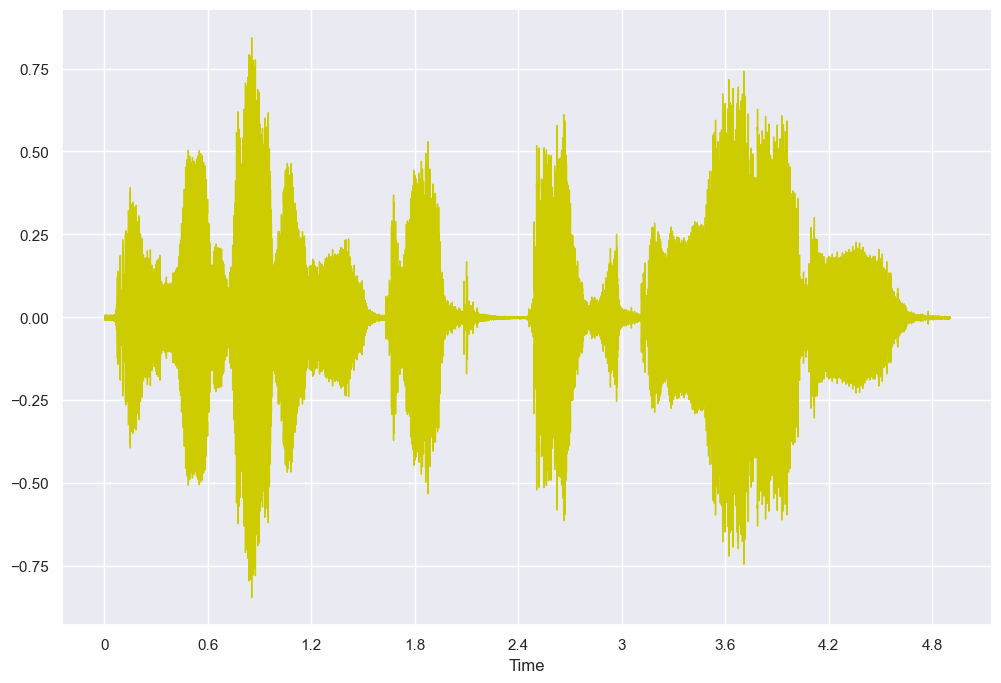

In [66]:
ale_file = audio_df[audio_df['Label'] == 'ale']['Filepath']
ale_array = audio_df[audio_df['Label'] == 'ale']['Arrays']

librosa.display.waveshow(ale_array.iloc[0], color='#CCCC00')
IPython.display.Audio(ale_file.iloc[0])

#### Neutro

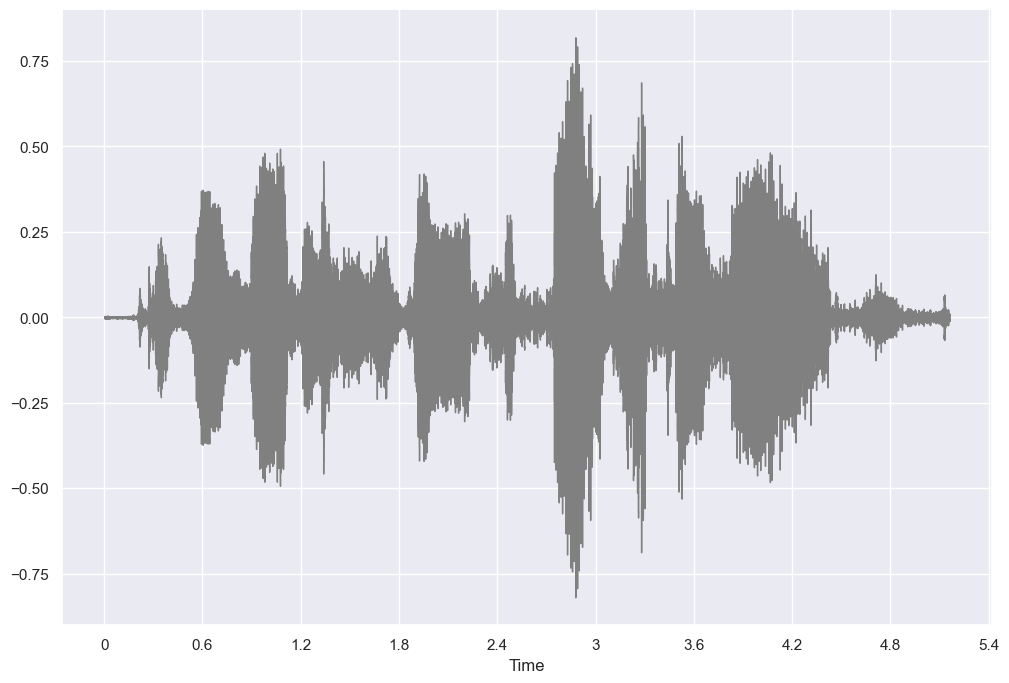

In [67]:
neu_file = audio_df[audio_df['Label'] == 'neu']['Filepath']
neu_array = audio_df[audio_df['Label'] == 'neu']['Arrays']

librosa.display.waveshow(neu_array.iloc[0], color='#808080')
IPython.display.Audio(neu_file.iloc[0])

#### Tristeza

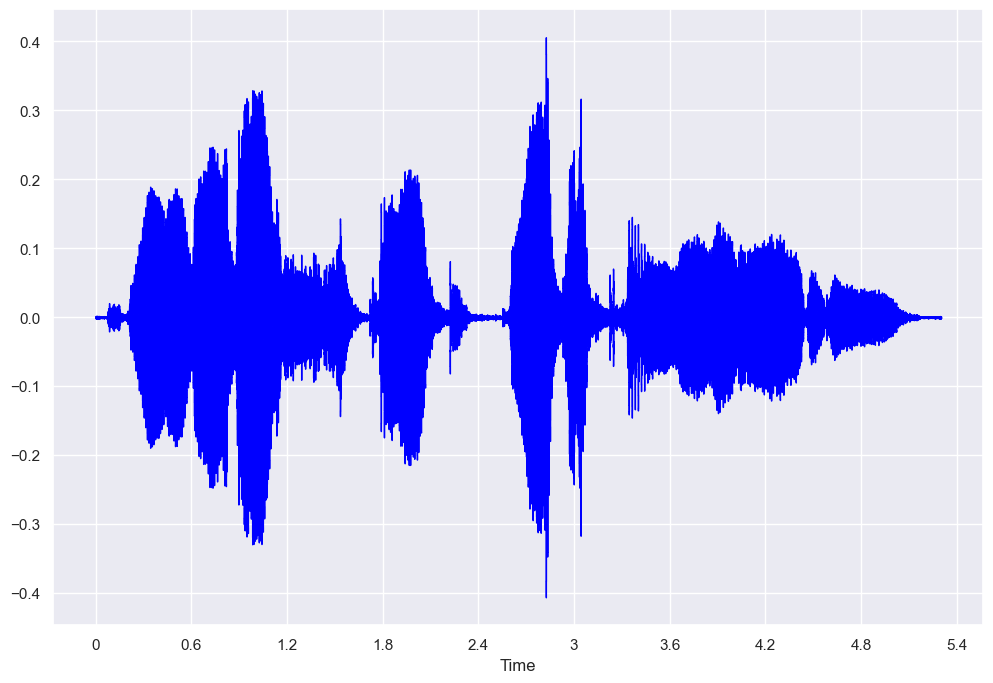

In [68]:
tri_file = audio_df[audio_df['Label'] == 'tri']['Filepath']
tri_array = audio_df[audio_df['Label'] == 'tri']['Arrays']

librosa.display.waveshow(tri_array.iloc[0], color='#0000FF')
IPython.display.Audio(tri_file.iloc[0])

### Data Augmentation

Noise injection

Stretching

Shifting

Pitching

In [70]:
def noise(data, random=False, rate=0.035, threshold=0.075):
    """Add some noise to sound sample. Use random if you want to add random noise with some threshold.
    Or use rate Random=False and rate for always adding fixed noise."""
    if random:
        rate = np.random.random() * threshold
    noise_amp = rate*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    """Stretching data with some rate."""
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data, rate=1000):
    """Shifting data with some rate"""
    shift_range = int(np.random.uniform(low=-5, high = 5)*rate)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7, random=False):
    """"Add some pitch to sound sample. Use random if you want to add random pitch with some threshold.
    Or use pitch_factor Random=False and rate for always adding fixed pitch."""
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

In [71]:
path = audio_df[audio_df["Label"] == "ale"]["Filepath"].iloc[0]
data, sampling_rate = librosa.load(path)

#### 1. Audio simples

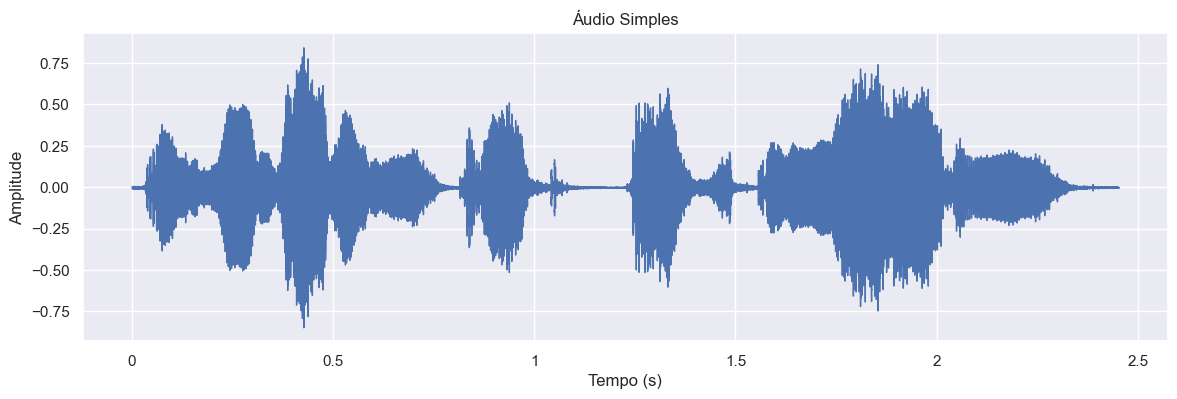

In [72]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(data)
plt.title('Áudio Simples')  
plt.xlabel('Tempo (s)')         
plt.ylabel('Amplitude')         

plt.show()

Audio(data, rate=sampling_rate)

#### 2. Noise

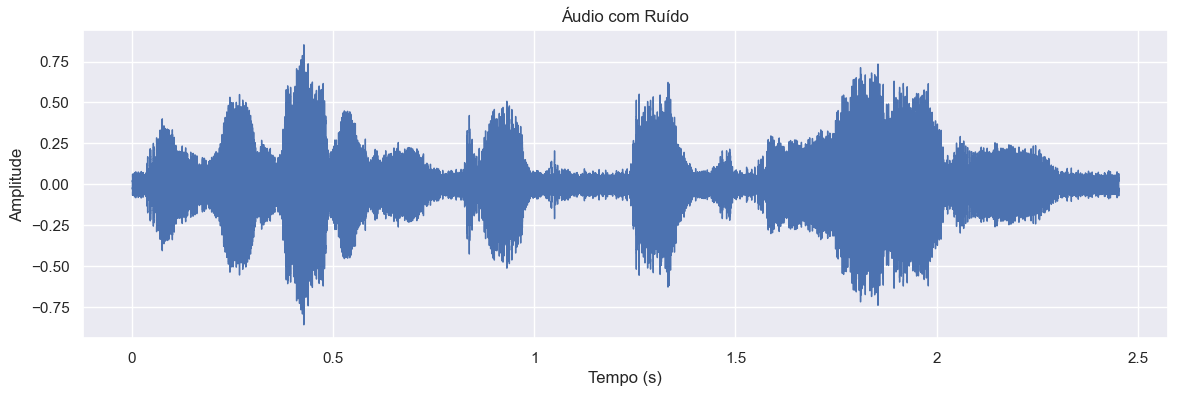

In [73]:
noised_data = noise(data, random=True)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=noised_data)
plt.title('Áudio com Ruído')  
plt.xlabel('Tempo (s)')         
plt.ylabel('Amplitude')         
Audio(noised_data, rate=sampling_rate)

#### 3. Strech

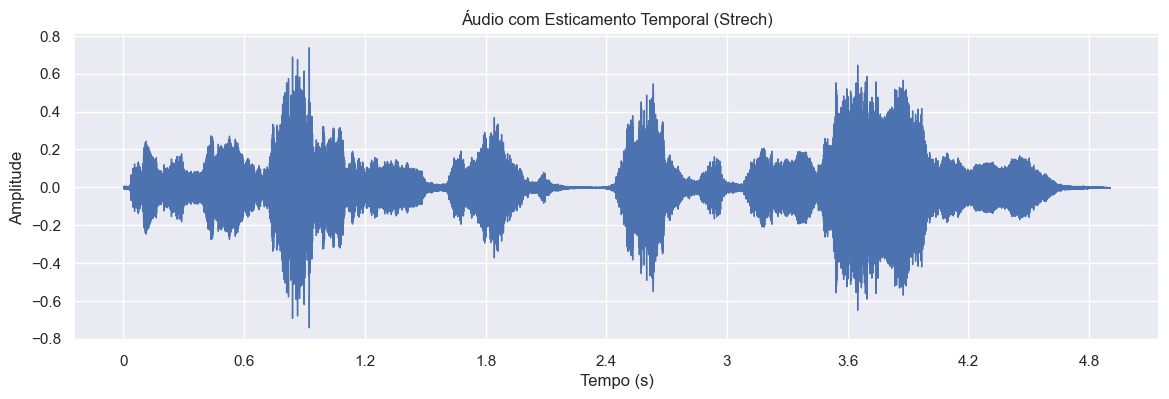

In [74]:
stretched_data = stretch(data, rate=0.5)
plt.figure(figsize=(14,4))
librosa.display.waveshow(stretched_data)
plt.title('Áudio com Esticamento Temporal (Strech)')  
plt.xlabel('Tempo (s)')         
plt.ylabel('Amplitude')  
Audio(stretched_data, rate=sampling_rate)

#### 4. Shift

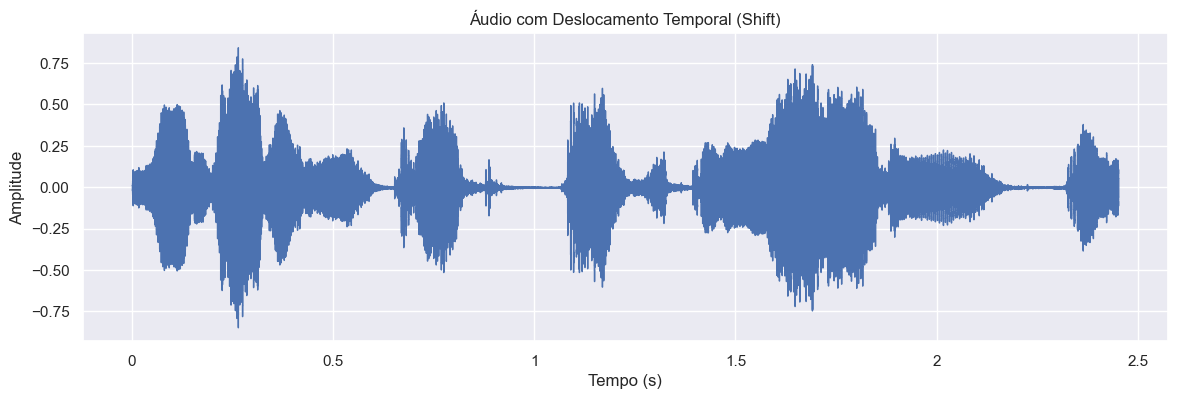

In [75]:
shifted_data = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=shifted_data)
plt.title('Áudio com Deslocamento Temporal (Shift)')  
plt.xlabel('Tempo (s)')         
plt.ylabel('Amplitude')  
Audio(shifted_data, rate=sampling_rate)

#### 5. Pitch

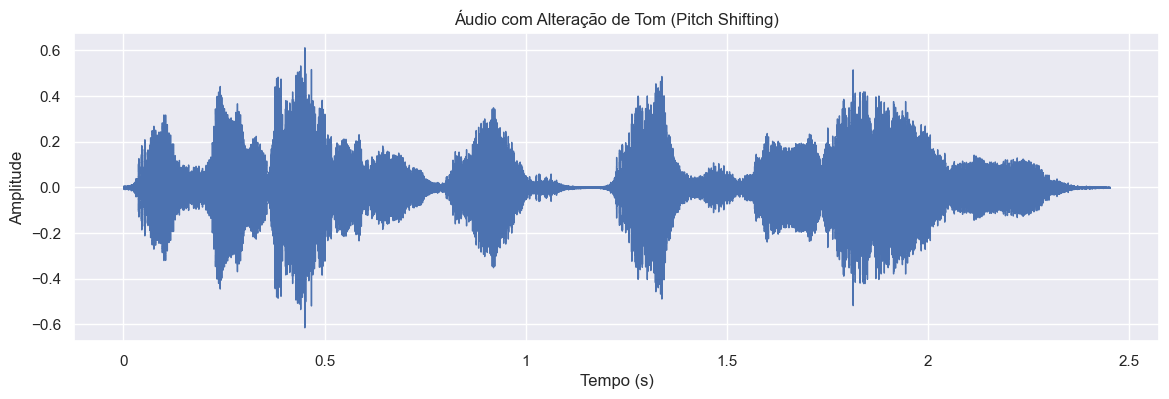

In [76]:
pitched_data = pitch(data, sampling_rate, pitch_factor=0.5, random=True)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=pitched_data)
plt.title('Áudio com Alteração de Tom (Pitch Shifting)')  
plt.xlabel('Tempo (s)')         
plt.ylabel('Amplitude')  
Audio(pitched_data, rate=sampling_rate)

### Extracting Features

In [77]:
def extract_features(data):
    # Zero Crossing Rate
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr))

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, chroma_stft))

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, mfcc))

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, mel))

    # Tonnetz
    #tonnetz = np.mean(librosa.feature.tonnetz(y=data, sr=sr).T, axis=0);
    #result = np.hstack((result, tonnetz));

    return result



In [78]:
def get_features(data):
    result = []

    # Without augmentation
    res1 = extract_features(data)
    result.append(res1)

    # With noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result.append(res2)

    # With stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sr)
    res3 = extract_features(data_stretch_pitch)
    result.append(res3)

    return result

In [79]:
audio_df['Arrays']

0       [-0.00036621094, -0.00030517578, 0.0010986328,...
1       [0.0002746582, -9.1552734e-05, -0.0002746582, ...
2       [-0.00030517578, 0.00045776367, 0.0008239746, ...
3       [0.00024414062, 0.0006713867, 0.0013427734, 0....
4       [0.0007324219, -0.00024414062, -0.0015869141, ...
                              ...                        
1162    [0.006225586, 0.0037231445, 0.0030517578, 0.00...
1163    [0.051116943, 0.04650879, 0.047576904, 0.04330...
1164    [0.0128479, 0.009918213, 0.0021362305, -0.0022...
1165    [0.0011901855, 0.00076293945, 0.00076293945, 0...
1166    [0.013519287, 0.011749268, 0.011199951, 0.0095...
Name: Arrays, Length: 1167, dtype: object

In [80]:
warnings.filterwarnings('ignore')

x = []
y = []
for i in range(len(audio_df)):
    feature=get_features(audio_df['Arrays'].iloc[i]);
    for j in feature:
        x.append(j)
        y.append(audio_df['Label'].iloc[i])

In [81]:
audio_df

Filepath Label  \
0     C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   ale   
1     C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   ale   
2     C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   ale   
3     C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   ale   
4     C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   ale   
...                                                 ...   ...   
1162  C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   tri   
1163  C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   tri   
1164  C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   tri   
1165  C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   tri   
1166  C:\Users\eduarda.almeida\Downloads\VERBO-Datas...   tri   

                                                 Arrays  
0     [-0.00036621094, -0.00030517578, 0.0010986328,...  
1     [0.0002746582, -9.1552734e-05, -0.0002746582, ...  
2     [-0.00030517578, 0.00045776367, 0.0008239746, ...  
3     [0.00024414062, 0.0006713867, 0.0013427734, 0....  
4     [0.0007324219, -0.00024414062, -0.0015869141, ...  
...                                                 ...  
1162  [0.006225586, 0.0037231445, 0.0030517578, 0.00...  
1163  [0.051116943, 0.04650879, 0.047576904, 0.04330...  
1164  [0.0128479, 0.009918213, 0.0021362305, -0.0022...  
1165  [0.0011901855, 0.00076293945, 0.00076293945, 0...  
1166  [0.013519287, 0.011749268, 0.011199951, 0.0095...  

[1167 rows x 3 columns]

In [82]:
le = LabelEncoder()
y = utils.to_categorical(le.fit_transform(y))
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Train Test Split

In [83]:
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.2)

In [84]:
print((x_train.shape, y_train.shape, x_test.shape, y_test.shape))

((2800, 161), (2800, 7), (701, 161), (701, 7))


In [85]:
x_train = np.expand_dims(x_train,axis=2)
x_test = np.expand_dims(x_test,axis=2)

In [86]:
print((x_train.shape, y_train.shape, x_test.shape, y_test.shape))

((2800, 161, 1), (2800, 7), (701, 161, 1), (701, 7))


In [87]:
x_train[0]

array([[ 5.47450616e-02],
       [ 8.55142653e-01],
       [ 7.70790815e-01],
       [ 6.48357034e-01],
       [ 6.37204409e-01],
       [ 6.73216701e-01],
       [ 6.56354487e-01],
       [ 4.99674946e-01],
       [ 4.83824670e-01],
       [ 4.94677246e-01],
       [ 4.74058121e-01],
       [ 5.21991014e-01],
       [ 6.84611619e-01],
       [-6.22020447e+02],
       [ 1.74512577e+01],
       [-2.22103672e+01],
       [ 1.53682947e+01],
       [-3.74311280e+00],
       [ 4.70168257e+00],
       [-1.90678444e+01],
       [-2.90278912e+00],
       [-1.63255749e+01],
       [-2.82499146e+00],
       [-3.29816175e+00],
       [-4.58542347e+00],
       [-1.37913904e+01],
       [-4.18406916e+00],
       [ 3.06275415e+00],
       [-1.44709091e+01],
       [-6.31906223e+00],
       [-4.12543917e+00],
       [-7.40657377e+00],
       [-6.12164545e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.0

In [88]:
#x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.1, random_state=42)

# mínimos e máximos globais
#min_val = x_train.min(axis=0, keepdims=True)
#max_val = x_train.max(axis=0, keepdims=True)

#range_val = max_val - min_val
#range_val = np.where(range_val == 0, 1, range_val)

# Normalizando para o intervalo [0, 1]
#x_train = (x_train - min_val) / range_val
#x_test = (x_test - min_val) / range_val

# Valores inválidos
#x_train = np.nan_to_num(x_train)
#x_test = np.nan_to_num(x_test)

#x_train = np.expand_dims(x_train, axis=2)
#x_test = np.expand_dims(x_test, axis=2)

#print("Verificando valores pós-normalização:")
#print(f"x_train: nan? {np.isnan(x_train).any()}, inf? {np.isinf(x_train).any()}")
#print(f"x_test: nan? {np.isnan(x_test).any()}, inf? {np.isinf(x_test).any()}")
#print("Formas dos dados:")
#print("x_train:", x_train.shape, "y_train:", y_train.shape)
#print("x_test:", x_test.shape, "y_test:", y_test.shape)


### Prumeira versão do modelo (Avaliação)

In [131]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.regularizers import l2

model = Sequential()
model.add(Conv1D(64, 5, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.4))

model.add(Conv1D(128, 5, activation='relu', kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.4))

model.add(Conv1D(256, 3, activation='relu', kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.0005)))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_27 (Conv1D)              │ (None, 157, 64)        │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 157, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_27 (MaxPooling1D) │ (None, 78, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 78, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_28 (Conv1D)              │ (None, 74, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 74, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_28 (MaxPooling1D) │ (None, 37, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 37, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_29 (Conv1D)              │ (None, 35, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 35, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_29 (MaxPooling1D) │ (None, 17, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 17, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 4352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │     2,228,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,374,151 (9.06 MB)

 Trainable params: 2,373,255 (9.05 MB)

 Non-trainable params: 896 (3.50 KB)

In [132]:
history = model.fit(
    x_train, y_train,
    epochs=500,
    batch_size=20,
    validation_data=(x_test, y_test),
)

Epoch 1/500
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1885 - loss: 4.1956 - val_accuracy: 0.1425 - val_loss: 2.7206
Epoch 2/500
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2190 - loss: 2.7967 - val_accuracy: 0.1766 - val_loss: 2.7660
Epoch 3/500
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2103 - loss: 2.5350 - val_accuracy: 0.1937 - val_loss: 2.5117
Epoch 4/500
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2342 - loss: 2.4401 - val_accuracy: 0.2165 - val_loss: 2.3714
Epoch 5/500
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2514 - loss: 2.3934 - val_accuracy: 0.2764 - val_loss: 2.3099
Epoch 6/500
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2634 - loss: 2.3453 - val_accuracy: 0.3020 - val_loss: 2.2728
Epoch 7/500
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2654 - loss: 2.3233 - val_accuracy: 0.2764 - val_loss: 2.2688
Epoch 8/500
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2553 - loss: 2.3115 - 

In [133]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(f"Acurácia de validação: {val_accuracy}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9478 - loss: 0.2983 
Acurácia de validação: 0.94017094373703


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


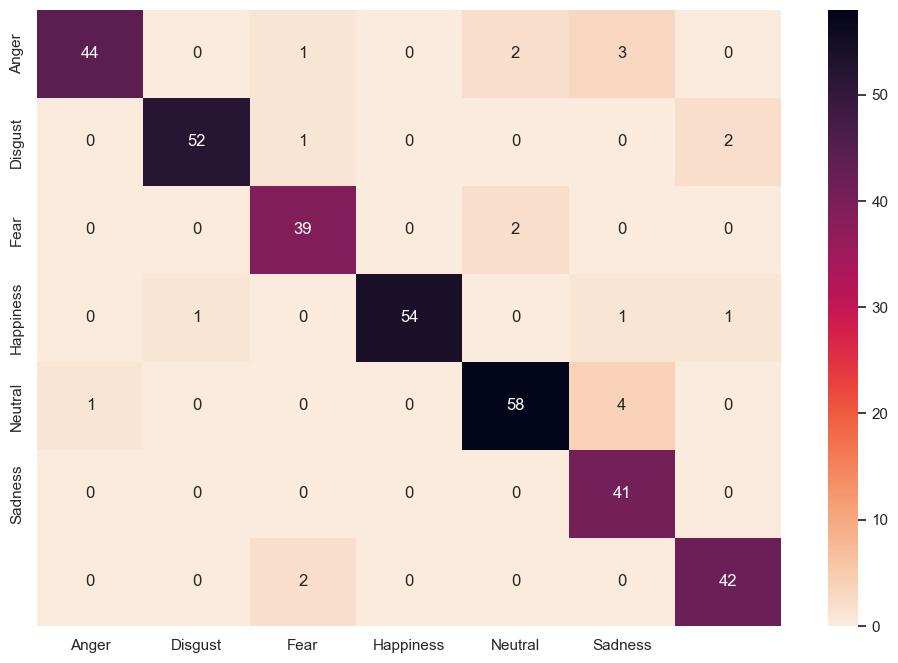

In [134]:
y_pred = model.predict(x_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'], yticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'])

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9478 - loss: 0.2983 
Accuracy of our model on test data :  94.017094373703 %


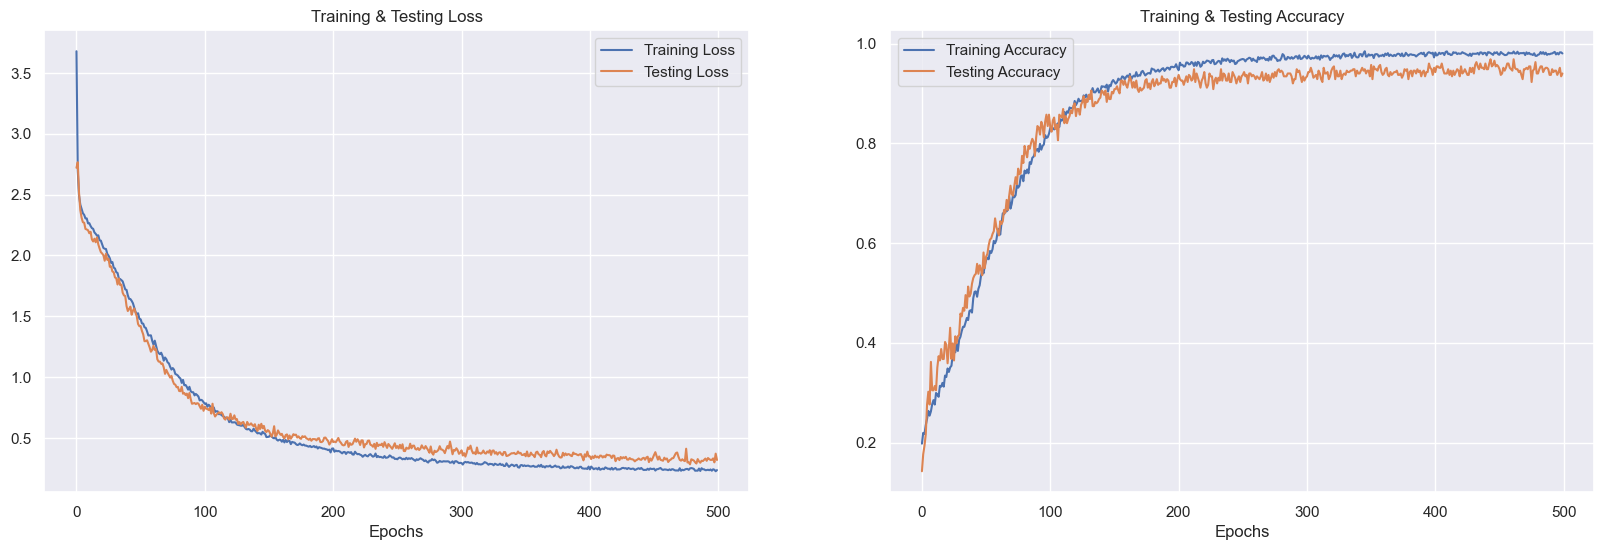

In [135]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(train_loss, label = 'Training Loss')
ax[0].plot(test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(train_acc, label = 'Training Accuracy')
ax[1].plot(test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [136]:
model.save('modelo_emocoes_11.h5')

In [92]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(x_test)

y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

report = classification_report(y_test_labels, y_pred_labels, target_names=["Raiva", "Desgosto", "Medo", "Felicidade", "Neutro", "Tristeza", "Surpresa"])

print("Relatório de Classificação:")
print(report)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Relatório de Classificação:
              precision    recall  f1-score   support

       Raiva       0.81      0.87      0.84        99
    Desgosto       0.81      0.73      0.77       103
        Medo       0.93      0.75      0.83       110
  Felicidade       0.76      0.88      0.81       107
      Neutro       0.72      0.84      0.77        91
    Tristeza       0.85      0.74      0.79       104
    Surpresa       0.82      0.86      0.84        87

    accuracy                           0.81       701
   macro avg       0.81      0.81      0.81       701
weighted avg       0.81      0.81      0.81       701



### Criando modelo compacto

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2

model3 = Sequential()

model3.add(Conv1D(16, 5, activation='relu', input_shape=(x_train.shape[1], 1), kernel_regularizer=l2(0.0002)))
model3.add(BatchNormalization())
model3.add(MaxPooling1D(2))
model3.add(Dropout(0.2))

model3.add(Conv1D(32, 3, activation='relu', kernel_regularizer=l2(0.0002)))
model3.add(BatchNormalization())
model3.add(MaxPooling1D(2))
model3.add(Dropout(0.2))

model3.add(Conv1D(16, 3, activation='relu', kernel_regularizer=l2(0.0002)))
model3.add(BatchNormalization())
model3.add(MaxPooling1D(2))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(32, activation='relu', kernel_regularizer=l2(0.0002)))
model3.add(Dropout(0.3))

model3.add(Dense(7, activation='softmax'))

model3.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

model3.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)               │ (None, 157, 16)        │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 157, 16)        │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 78, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 78, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 76, 32)         │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 76, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 38, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 38, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 36, 16)         │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 36, 16)         │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 18, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 18, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,951 (50.59 KB)

 Trainable params: 12,823 (50.09 KB)

 Non-trainable params: 128 (512.00 B)

In [112]:
history = model3.fit(
    x_train, y_train,
    epochs=2200,
    batch_size=20,
    validation_data=(x_test, y_test),
)

Epoch 1/2200
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1313 - loss: 2.9723 - val_accuracy: 0.1027 - val_loss: 2.0316
Epoch 2/2200
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1277 - loss: 2.3966 - val_accuracy: 0.0699 - val_loss: 1.9728
Epoch 3/2200
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1332 - loss: 2.1482 - val_accuracy: 0.1484 - val_loss: 1.9612
Epoch 4/2200
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1307 - loss: 2.0865 - val_accuracy: 0.1641 - val_loss: 1.9606
Epoch 5/2200
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1305 - loss: 2.0239 - val_accuracy: 0.1641 - val_loss: 1.9652
Epoch 6/2200
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1414 - loss: 2.0146 - val_accuracy: 0.1484 - val_loss: 1.9661
Epoch 7/2200
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1498 - loss: 2.0004 - val_accuracy: 0.1498 - val_loss: 1.9669
Epoch 8/2200
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1455 - loss: 1.9843 - 

In [113]:
from sklearn.metrics import classification_report
import numpy as np

# Prevendo os rótulos para o conjunto de teste
y_pred = model3.predict(x_test)

# Convertendo as previsões e os rótulos reais para índices (caso estejam one-hot encoded)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Gerando o relatório de classificação
report = classification_report(y_test_labels, y_pred_labels, target_names=["Raiva", "Desgosto", "Medo", "Felicidade", "Neutro", "Tristeza", "Surpresa"])

print("Relatório de Classificação:")
print(report)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Relatório de Classificação:
              precision    recall  f1-score   support

       Raiva       0.55      0.73      0.63        73
    Desgosto       0.56      0.48      0.52       119
        Medo       0.68      0.47      0.55       105
  Felicidade       0.69      0.73      0.71       112
      Neutro       0.80      0.67      0.73       105
    Tristeza       0.73      0.66      0.69       102
    Surpresa       0.49      0.76      0.59        85

    accuracy                           0.63       701
   macro avg       0.64      0.64      0.63       701
weighted avg       0.65      0.63      0.63       701



22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6561 - loss: 0.9605 
Accuracy of our model on test data :  63.19543719291687 %


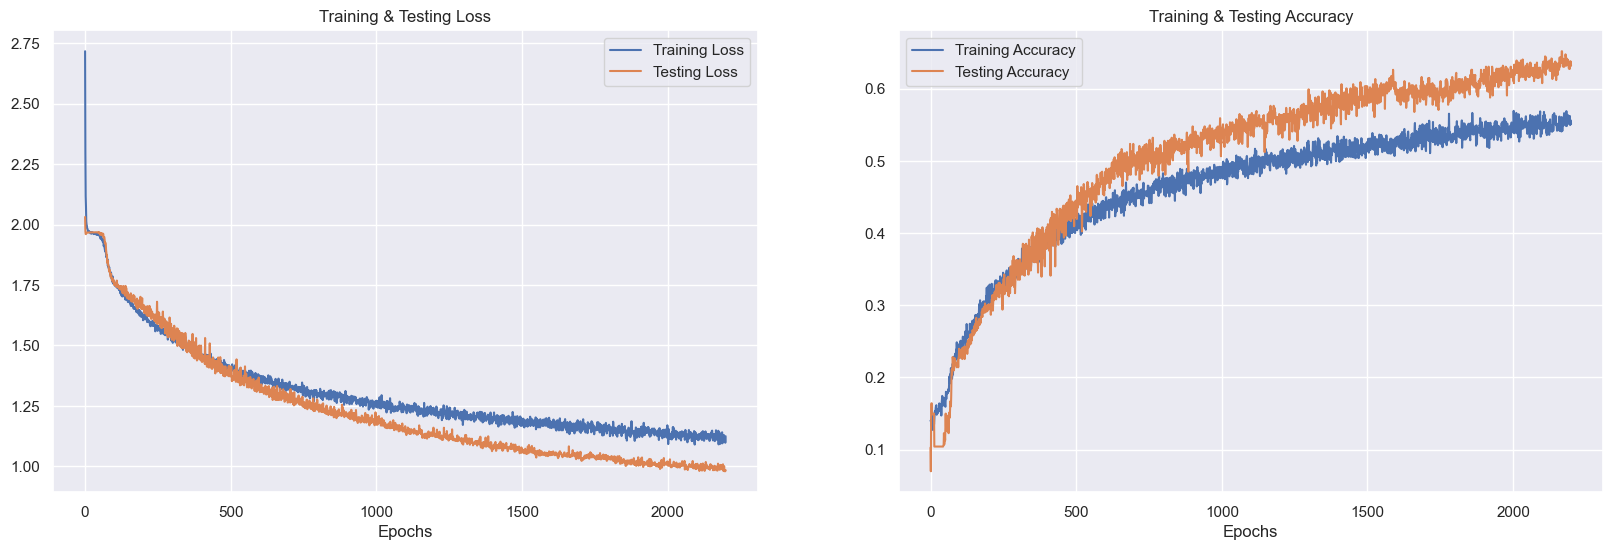

In [115]:
print("Accuracy of our model on test data : " , model3.evaluate(x_test,y_test)[1]*100 , "%")

fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(train_loss, label = 'Training Loss')
ax[0].plot(test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(train_acc, label = 'Training Accuracy')
ax[1].plot(test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


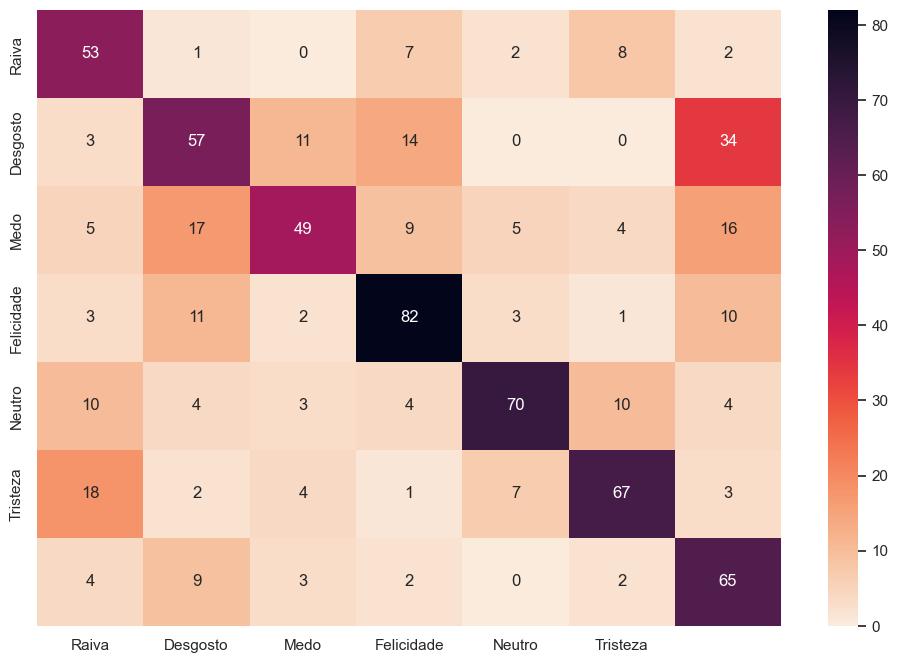

In [116]:
y_pred = model3.predict(x_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['Raiva', 'Desgosto', 'Medo', 'Felicidade', 'Neutro', 'Tristeza'], yticklabels = ['Raiva', 'Desgosto', 'Medo', 'Felicidade', 'Neutro', 'Tristeza'])

### Criando modelo final

In [268]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2

model2 = Sequential()

# Primeira camada convolucional
model2.add(Conv1D(256, 5, activation='relu', input_shape=(x_train.shape[1], 1), kernel_regularizer=l2(0.0002)))
model2.add(BatchNormalization())
model2.add(MaxPooling1D(2))
model2.add(Dropout(0.5))

# Segunda camada convolucional
model2.add(Conv1D(512, 3, activation='relu', kernel_regularizer=l2(0.0002)))
model2.add(BatchNormalization())
model2.add(MaxPooling1D(2))
model2.add(Dropout(0.4))

# Terceira camada convolucional (nova)
model2.add(Conv1D(256, 3, activation='relu', kernel_regularizer=l2(0.0002)))
model2.add(BatchNormalization())
model2.add(MaxPooling1D(2))
model2.add(Dropout(0.5))

# Camada Flatten
model2.add(Flatten())

# Camada densa
model2.add(Dense(256, activation='relu', kernel_regularizer=l2(0.0002)))
model2.add(Dropout(0.5))

# Camada de saída
model2.add(Dense(7, activation='softmax'))

# Compilação
model2.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

model2.summary()

history = model2.fit(
    x_train, y_train,
    epochs=1000,
    batch_size=20,
    validation_data=(x_test, y_test),
)


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_117 (Conv1D)             │ (None, 157, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_115         │ (None, 157, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_117               │ (None, 78, 256)        │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_163 (Dropout)           │ (None, 78, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_118 (Conv1D)             │ (None, 76, 512)        │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_116         │ (None, 76, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_118               │ (None, 38, 512)        │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_164 (Dropout)           │ (None, 38, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_119 (Conv1D)             │ (None, 36, 256)        │       393,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_117         │ (None, 36, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_119               │ (None, 18, 256)        │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_165 (Dropout)           │ (None, 18, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_44 (Flatten)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_166 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,974,535 (7.53 MB)

 Trainable params: 1,972,487 (7.52 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/1000
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.1446 - loss: 4.1400 - val_accuracy: 0.1327 - val_loss: 2.1802
Epoch 2/1000
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.1473 - loss: 2.4177 - val_accuracy: 0.1583 - val_loss: 2.1817
Epoch 3/1000
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.1472 - loss: 2.2444 - val_accuracy: 0.1398 - val_loss: 2.1797
Epoch 4/1000
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.1546 - loss: 2.2063 - val_accuracy: 0.1398 - val_loss: 2.1794
Epoch 5/1000
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.1511 - loss: 2.2030 - val_accuracy: 0.1398 - val_loss: 2.1790
Epoch 6/1000
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.1376 - loss: 2.1945 - val_accuracy: 0.1398 - val_loss: 2.1786
Epoch 7/1000
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.1555 - loss: 2.1862 - val_accuracy: 0.1398 - val_loss: 2.1781
Epoch 8/1000
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.1566 - loss: 

In [269]:
from sklearn.metrics import classification_report
import numpy as np

# Prevendo os rótulos para o conjunto de teste
y_pred = model2.predict(x_test)

# Convertendo as previsões e os rótulos reais para índices (caso estejam one-hot encoded)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Gerando o relatório de classificação
report = classification_report(y_test_labels, y_pred_labels, target_names=["Raiva", "Desgosto", "Medo", "Felicidade", "Neutro", "Tristeza", "Surpresa"])

print("Relatório de Classificação:")
print(report)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
Relatório de Classificação:
              precision    recall  f1-score   support

       Raiva       0.82      0.88      0.85        92
    Desgosto       0.92      0.78      0.85       105
        Medo       0.91      0.87      0.89       112
  Felicidade       0.82      0.97      0.89        77
      Neutro       0.85      0.91      0.88       103
    Tristeza       0.90      0.85      0.87        98
    Surpresa       0.89      0.88      0.88       114

    accuracy                           0.87       701
   macro avg       0.87      0.88      0.87       701
weighted avg       0.88      0.87      0.87       701



22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1632 - loss: 13561.9072
Accuracy of our model on test data :  16.26248210668564 %


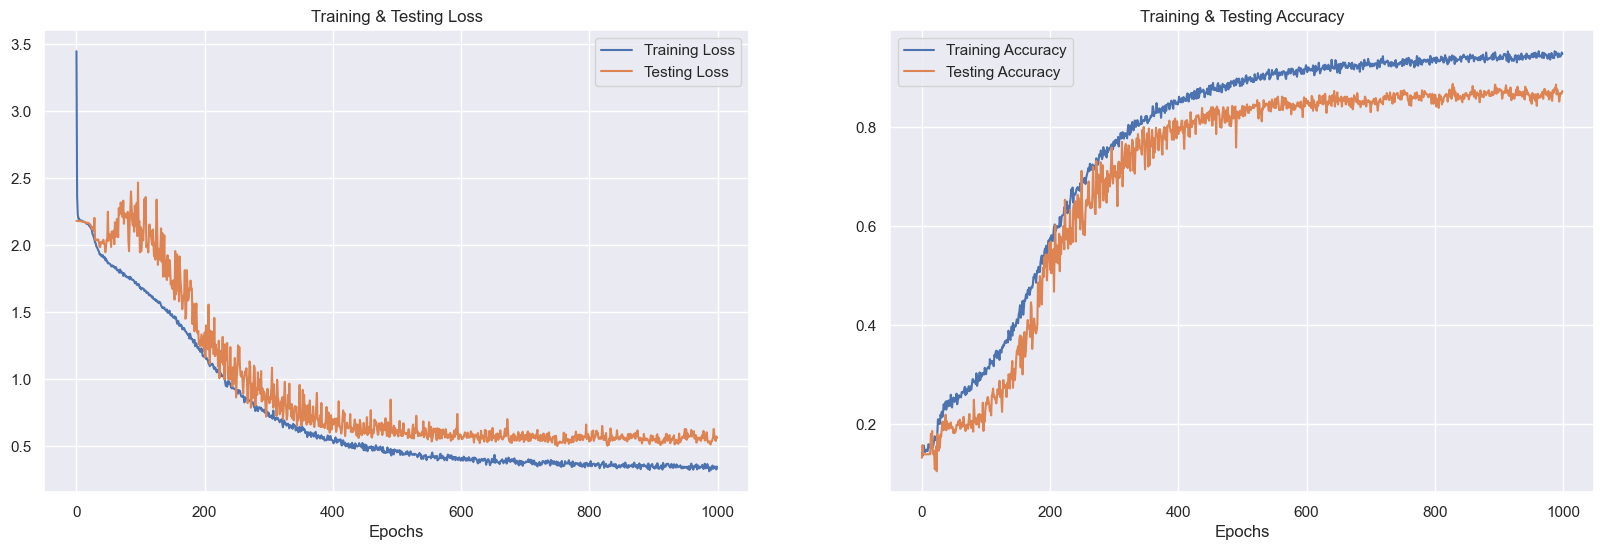

In [270]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(train_loss, label = 'Training Loss')
ax[0].plot(test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(train_acc, label = 'Training Accuracy')
ax[1].plot(test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


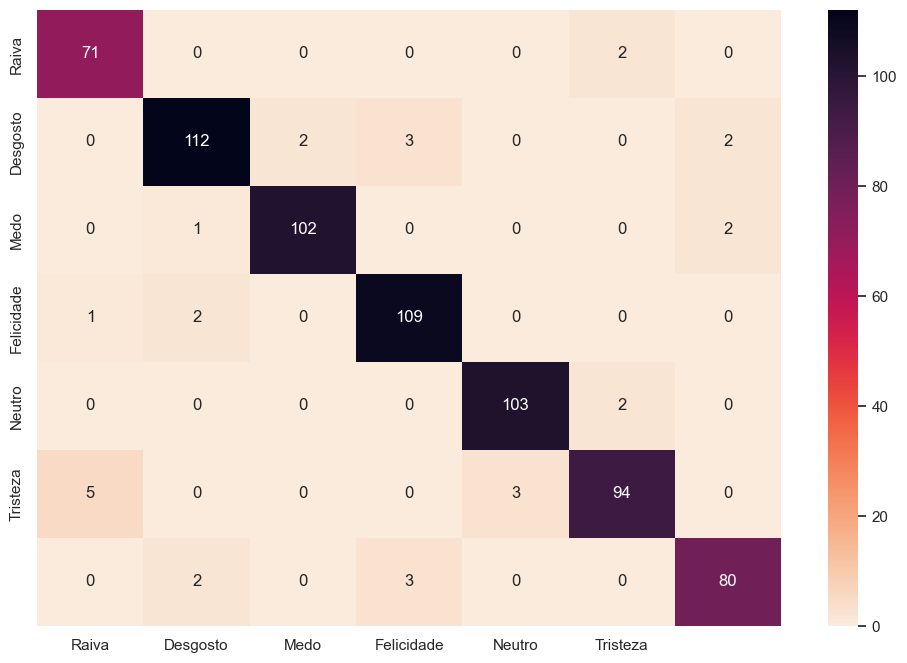

In [91]:
model2 = tf.keras.models.load_model('model_34.h5')
y_pred = model2.predict(x_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['Raiva', 'Desgosto', 'Medo', 'Felicidade', 'Neutro', 'Tristeza'], yticklabels = ['Raiva', 'Desgosto', 'Medo', 'Felicidade', 'Neutro', 'Tristeza'])

In [271]:
# Salvar o modelo inteiro como um arquivo .h5
#model2.save('modelo_emocoes_norm_reduz_2.h5')
model2.save('model_36.h5')

### Salvando modelo compato em .tflite

In [169]:
import tensorflow as tf

# Converter para TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model2)
tflite_model = converter.convert()

# Salvar o modelo convertido
#with open('modelo_emocoes_norm_reduz_2.tflite', 'wb') as f:
with open('modelo_teste_reduzido.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\EDUARD~1.ALM\AppData\Local\Temp\tmpmad94fd6\assets


INFO:tensorflow:Assets written to: C:\Users\EDUARD~1.ALM\AppData\Local\Temp\tmpmad94fd6\assets


Saved artifact at 'C:\Users\EDUARD~1.ALM\AppData\Local\Temp\tmpmad94fd6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 161, 1), dtype=tf.float32, name='keras_tensor_2004')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  2403283696128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403283922336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403415235168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403415237808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403415233408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403415238512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2404086053376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2404086054080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403388363120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403388363648: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [170]:
interpreter = tf.lite.Interpreter(model_path="modelo_teste.tflite")
interpreter.allocate_tensors()
for tensor_details in interpreter.get_tensor_details():
    print(tensor_details)

{'name': 'serving_default_keras_tensor_1093:0', 'index': 0, 'shape': array([  1, 161,   1], dtype=int32), 'shape_signature': array([ -1, 161,   1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
{'name': 'arith.constant', 'index': 1, 'shape': array([3], dtype=int32), 'shape_signature': array([3], dtype=int32), 'dtype': <class 'numpy.int32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
{'name': 'arith.constant1', 'index': 2, 'shape': array([3], dtype=int32), 'shape_signature': array([3], dtype=int32), 'dtype': <class 'numpy.int32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized

In [176]:
import os

# Variáveis
MODEL_TFLITE = "C:/Users/eduarda.almeida/Downloads/Speech_Emotion_Recognition/modelo_teste_reduzido.tflite"
MODEL_TFLITE_MICRO = "C:/Users/eduarda.almeida/Downloads/Speech_Emotion_Recognition/model_teste_reduzido.cc"

from charset_normalizer import detect

# Detectar a codificação
with open(MODEL_TFLITE_MICRO, "rb") as file:
    raw_data = file.read()
    result = detect(raw_data)

detected_encoding = result['encoding']
print(f"Codificação detectada: {detected_encoding}")

# Abrir o arquivo usando a codificação detectada
with open(MODEL_TFLITE_MICRO, "r", encoding=detected_encoding) as file:
    content = file.read()

# Substituir o texto
REPLACE_TEXT = MODEL_TFLITE.replace('/', '_').replace('.', '_')
content = content.replace(REPLACE_TEXT, "g_model")

# Salvar o arquivo
with open(MODEL_TFLITE_MICRO, "w", encoding=detected_encoding) as file:
    file.write(content)

print("Texto substituído com sucesso!")


Codificação detectada: UTF-16
Texto substituído com sucesso!


In [8]:
import tensorflow as tf
import numpy as np

# Carregar o modelo TensorFlow Lite
interpreter = tf.lite.Interpreter(model_path="modelo_teste_reduzido.tflite")

# Obter o tensor de entrada e suas dimensões
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Informações sobre a entrada
input_shape = input_details[0]['shape']
input_dtype = input_details[0]['dtype']

# Exibir as dimensões do tensor de entrada
print(f"Dimensões esperadas do tensor de entrada pelo modelo TensorFlow Lite: {input_shape}")
print(f"Tamanho do batch: {input_shape[0]}")  # Normalmente é None (batch dinâmico)
print(f"Slice count (dimensão 1): {input_shape[1]}")  # Número de fatias
print(f"Slice size (dimensão 2): {input_shape[2]}")  # Número de features por fatia

# Exibir o tipo de dado do tensor de entrada
print(f"Tipo de dado do tensor de entrada: {input_dtype}")

# Inicializar o interpretador e carregar os tensores
interpreter.allocate_tensors()


Dimensões esperadas do tensor de entrada pelo modelo TensorFlow Lite: [  1 161   1]
Tamanho do batch: 1
Slice count (dimensão 1): 161
Slice size (dimensão 2): 1
Tipo de dado do tensor de entrada: <class 'numpy.float32'>


### Avaliando modelo MLP

In [119]:
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.2)
x_train = np.expand_dims(x_train,axis=2)
x_test = np.expand_dims(x_test,axis=2)
print((x_train.shape, y_train.shape, x_test.shape, y_test.shape))


((2800, 161, 1), (2800, 7), (701, 161, 1), (701, 7))


In [120]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Ajustar os rótulos para inteiros
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

# Ajustar entrada para MLP
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Modelo MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')  # 7 emoções
])

model.summary()


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 64)             │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,983 (58.53 KB)

 Trainable params: 14,983 (58.53 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=1200, batch_size=32, validation_data=(x_test, y_test))

# Converter para TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Salvar o modelo convertido
with open('mlp_emotions.tflite', 'wb') as f:
    f.write(tflite_model)

Epoch 1/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1509 - loss: 40.0423 - val_accuracy: 0.1541 - val_loss: 4.5497
Epoch 2/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1472 - loss: 9.0916 - val_accuracy: 0.1555 - val_loss: 2.5861
Epoch 3/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1787 - loss: 4.2875 - val_accuracy: 0.1897 - val_loss: 2.1438
Epoch 4/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1989 - loss: 2.8141 - val_accuracy: 0.2197 - val_loss: 1.9354
Epoch 5/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.1922 - loss: 2.2448 - val_accuracy: 0.2268 - val_loss: 1.8053
Epoch 6/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2081 - loss: 2.0115 - val_accuracy: 0.2382 - val_loss: 1.7545
Epoch 7/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2154 - loss: 1.9066 - val_accuracy: 0.2853 - val_loss: 1.7207
Epoch 8/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.2120 - loss: 1.8391 - val_accurac

INFO:tensorflow:Assets written to: C:\Users\EDUARD~1.ALM\AppData\Local\Temp\tmp2s0jciyl\assets


Saved artifact at 'C:\Users\EDUARD~1.ALM\AppData\Local\Temp\tmp2s0jciyl'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 161), dtype=tf.float32, name='keras_tensor_1414')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  2403283912480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403363866928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403363878192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403364029360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403364033760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403364030592: TensorSpec(shape=(), dtype=tf.resource, name=None)


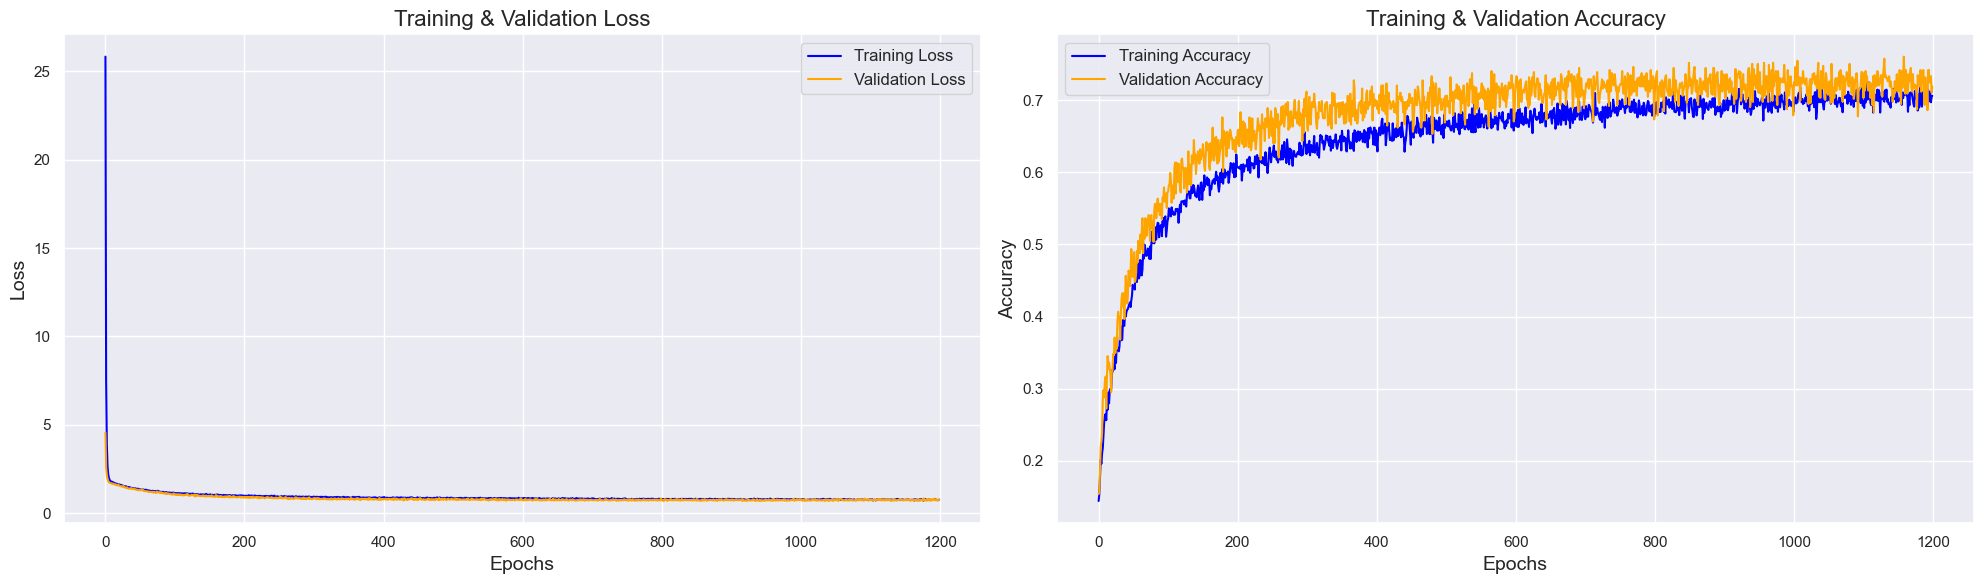

In [122]:
# Plotagem das métricas
train_acc = history.history['accuracy'] 
train_loss = history.history['loss']  
val_acc = history.history['val_accuracy']  
val_loss = history.history['val_loss']  

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Gráfico de Loss
ax[0].plot(train_loss, label='Training Loss', color='blue')
ax[0].plot(val_loss, label='Validation Loss', color='orange')
ax[0].set_title('Training & Validation Loss', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Loss', fontsize=14)
ax[0].legend(fontsize=12)
ax[0].grid(True)

# Gráfico de Accuracy
ax[1].plot(train_acc, label='Training Accuracy', color='blue')
ax[1].plot(val_acc, label='Validation Accuracy', color='orange')
ax[1].set_title('Training & Validation Accuracy', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)
ax[1].legend(fontsize=12)
ax[1].grid(True)

plt.tight_layout()
plt.show()

### Avaliando modelo LSTM

In [128]:
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.2)
x_train = np.expand_dims(x_train,axis=2)
x_test = np.expand_dims(x_test,axis=2)
print((x_train.shape, y_train.shape, x_test.shape, y_test.shape))


((2800, 161, 1), (2800, 7), (701, 161, 1), (701, 7))


In [130]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

if len(y_train.shape) > 1 and y_train.shape[1] == 7: 
    y_train = np.argmax(y_train, axis=1)
    y_test = np.argmax(y_test, axis=1)

# Modelo LSTM
model = Sequential([
    LSTM(128, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax') 
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_test, y_test))

#TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('lstm_emotions.tflite', 'wb') as f:
    f.write(tflite_model)


Epoch 1/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.1489 - loss: 1.9467 - val_accuracy: 0.1341 - val_loss: 1.9467
Epoch 2/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.1539 - loss: 1.9462 - val_accuracy: 0.1198 - val_loss: 1.9477
Epoch 3/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.1382 - loss: 1.9468 - val_accuracy: 0.1198 - val_loss: 1.9478
Epoch 4/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.1341 - loss: 1.9464 - val_accuracy: 0.1198 - val_loss: 1.9476
Epoch 5/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.1449 - loss: 1.9461 - val_accuracy: 0.1198 - val_loss: 1.9472
Epoch 6/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.1530 - loss: 1.9461 - val_accuracy: 0.1341 - val_loss: 1.9469
Epoch 7/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.1606 - loss: 1.9459 - val_accuracy: 0.1198 - val_loss: 1.9470
Epoch 8/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.1432 - loss: 1.9461 - val_accuracy: 0.1198 - v

INFO:tensorflow:Assets written to: C:\Users\EDUARD~1.ALM\AppData\Local\Temp\tmp251qtblm\assets


Saved artifact at 'C:\Users\EDUARD~1.ALM\AppData\Local\Temp\tmp251qtblm'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 161, 1), dtype=tf.float32, name='keras_tensor_1429')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  2403444328752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403885176912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403885179552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403885175504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403885172512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403885173392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403885172160: TensorSpec(shape=(), dtype=tf.resource, name=None)


ConverterError: Variable constant folding is failed. Please consider using enabling `experimental_enable_resource_variables` flag in the TFLite converter object. For example, converter.experimental_enable_resource_variables = True<unknown>:0: error: loc(callsite(callsite(fused["TensorListReserve:", "sequential_25_1/lstm_2_1/TensorArrayV2_1@__inference_function_1835421"] at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_1835460"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"])): 'tf.TensorListReserve' op requires element_shape to be static during TF Lite transformation pass
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"]): called from
<unknown>:0: error: loc(callsite(callsite(fused["TensorListReserve:", "sequential_25_1/lstm_2_1/TensorArrayV2_1@__inference_function_1835421"] at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_1835460"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"])): failed to legalize operation 'tf.TensorListReserve' that was explicitly marked illegal
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"]): called from
<unknown>:0: error: Lowering tensor list ops is failed. Please consider using Select TF ops and disabling `_experimental_lower_tensor_list_ops` flag in the TFLite converter object. For example, converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]\n converter._experimental_lower_tensor_list_ops = False


### Avaliando modelo GRU

In [136]:
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.2)
x_train = np.expand_dims(x_train,axis=2)
x_test = np.expand_dims(x_test,axis=2)
print((x_train.shape, y_train.shape, x_test.shape, y_test.shape))

((2800, 161, 1), (2800, 7), (701, 161, 1), (701, 7))


In [137]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Modelo GRU

model = Sequential([
    GRU(128, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')  
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('gru_emotions.tflite', 'wb') as f:
    f.write(tflite_model)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.1387 - loss: 1.9463 - val_accuracy: 0.1555 - val_loss: 1.9464
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1368 - loss: 1.9464 - val_accuracy: 0.1341 - val_loss: 1.9473
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1384 - loss: 1.9463 - val_accuracy: 0.1341 - val_loss: 1.9471
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.1433 - loss: 1.9460 - val_accuracy: 0.1284 - val_loss: 1.9467
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.1451 - loss: 1.9455 - val_accuracy: 0.1341 - val_loss: 1.9470
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1468 - loss: 1.9459 - val_accuracy: 0.1284 - val_loss: 1.9470
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1293 - loss: 1.9459 - val_accuracy: 0.1355 - val_loss: 1.9474
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1400 - loss: 1.9459 - val_accuracy: 0.1355 - v

INFO:tensorflow:Assets written to: C:\Users\EDUARD~1.ALM\AppData\Local\Temp\tmp912q2vm7\assets


Saved artifact at 'C:\Users\EDUARD~1.ALM\AppData\Local\Temp\tmp912q2vm7'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 161, 1), dtype=tf.float32, name='keras_tensor_1444')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  2403363874848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403282633120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403363865520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403363867984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403363876080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403363877664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403363877312: TensorSpec(shape=(), dtype=tf.resource, name=None)


ConverterError: Variable constant folding is failed. Please consider using enabling `experimental_enable_resource_variables` flag in the TFLite converter object. For example, converter.experimental_enable_resource_variables = True<unknown>:0: error: loc(callsite(callsite(fused["TensorListReserve:", "sequential_28_1/gru_2_1/TensorArrayV2_1@__inference_function_1872707"] at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_1872746"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"])): 'tf.TensorListReserve' op requires element_shape to be static during TF Lite transformation pass
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"]): called from
<unknown>:0: error: loc(callsite(callsite(fused["TensorListReserve:", "sequential_28_1/gru_2_1/TensorArrayV2_1@__inference_function_1872707"] at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_1872746"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"])): failed to legalize operation 'tf.TensorListReserve' that was explicitly marked illegal
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"]): called from
<unknown>:0: error: Lowering tensor list ops is failed. Please consider using Select TF ops and disabling `_experimental_lower_tensor_list_ops` flag in the TFLite converter object. For example, converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]\n converter._experimental_lower_tensor_list_ops = False


In [145]:
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.2)
x_train = np.expand_dims(x_train,axis=2)
x_test = np.expand_dims(x_test,axis=2)
print((x_train.shape, y_train.shape, x_test.shape, y_test.shape))

((2800, 161, 1), (2800, 7), (701, 161, 1), (701, 7))
